In [3]:
import pandas as pd
import seaborn as sns

df = sns.load_dataset("titanic")
X = df.loc[:, (df.columns != "alive") & (df.columns != "survived")]
X = pd.get_dummies(X, drop_first=True)
y = df["survived"]

In [4]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)


In [7]:
from xgboost import XGBClassifier

model = XGBClassifier(early_stopping_rounds=10)

eval_set = [(X_test, y_test)]
model.fit(X_train, y_train, eval_set=eval_set, verbose=True)

[0]	validation_0-logloss:0.55521
[1]	validation_0-logloss:0.50664
[2]	validation_0-logloss:0.47691
[3]	validation_0-logloss:0.46767
[4]	validation_0-logloss:0.46389
[5]	validation_0-logloss:0.46236
[6]	validation_0-logloss:0.46180
[7]	validation_0-logloss:0.46583
[8]	validation_0-logloss:0.46741
[9]	validation_0-logloss:0.46252
[10]	validation_0-logloss:0.46733
[11]	validation_0-logloss:0.47090
[12]	validation_0-logloss:0.47082
[13]	validation_0-logloss:0.47207
[14]	validation_0-logloss:0.47262
[15]	validation_0-logloss:0.47352


XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=10,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, random_state=None, ...)

In [9]:
y_pred_proba = model.predict_proba(X_test)

In [10]:
from sklearn.metrics import log_loss
log_loss(y_test, y_pred_proba)

0.461798088015216

<BarContainer object of 22 artists>

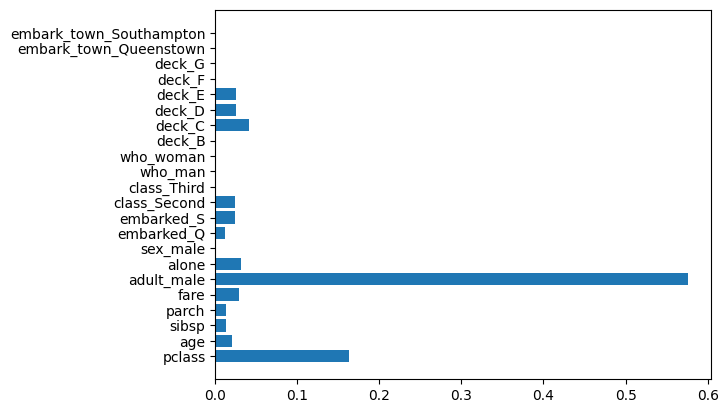

In [12]:
import matplotlib.pyplot as plt

plt.barh(X_train.columns, model.feature_importances_)